In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv(r'D:\ML_Projects\Stock-Market-Prediction\NIFTY 50_minute_data.csv')
stock_data.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [17]:
stock_data['open'].describe()

count    932946.000000
mean      13623.775737
std        5047.819576
min        6846.800000
25%        9428.450000
50%       11561.450000
75%       17607.137500
max       26273.400000
Name: open, dtype: float64

In [18]:
stock_data['open'] = stock_data['open'].apply(lambda x: round(x-6847))

In [19]:
stock_data['open'].nunique()

18808

In [20]:
stock_data['open'].unique()

array([ 1438,  1446,  1440, ..., 16005, 15999, 16023], dtype=int64)

In [3]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data['date_only'] = stock_data['date'].dt.date
stock_data['date_only']

0         2015-01-09
1         2015-01-09
2         2015-01-09
3         2015-01-09
4         2015-01-09
             ...    
932941    2025-02-07
932942    2025-02-07
932943    2025-02-07
932944    2025-02-07
932945    2025-02-07
Name: date_only, Length: 932946, dtype: object

In [22]:
stock_data.groupby('date_only')['open'].count().unique()

array([375, 364, 355, 376, 370, 377, 371, 367, 374, 373,  72, 357,  60,
       336, 372, 361,  54, 368, 105, 369], dtype=int64)

In [23]:
data = stock_data.groupby('date_only')['open'].apply(list).reset_index()
data = data.drop(['date_only'], axis=1)

In [24]:
data.to_csv(r'D:\ML_Projects\Stock-Market-Prediction\stock_open_data.csv', index=False)

In [ ]:
data = pd.read_csv(r'D:\ML_Projects\Stock-Market-Prediction\stock_open_data.csv')
data = data['open'].apply(lambda x:list(int(i) for i in x.strip('[]').split(', ')))
data = data.to_list()

In [26]:
vocab = set(j for i in data for j in i)
print(len(vocab))
print(min(vocab))
print(max(vocab))

18808
0
19426


In [6]:
stock_data = stock_data.drop(['volume'], axis=1)
stock_data

,date,open,high,low,close,date_only
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,2015-01-09
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,2015-01-09
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,2015-01-09
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,2015-01-09
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,2015-01-09
...,...,...,...,...,...,...
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,2025-02-07
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,2025-02-07
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,2025-02-07
932944,2025-02-07 15:28:00,23577.05,23578.60,23567.45,23568.10,2025-02-07


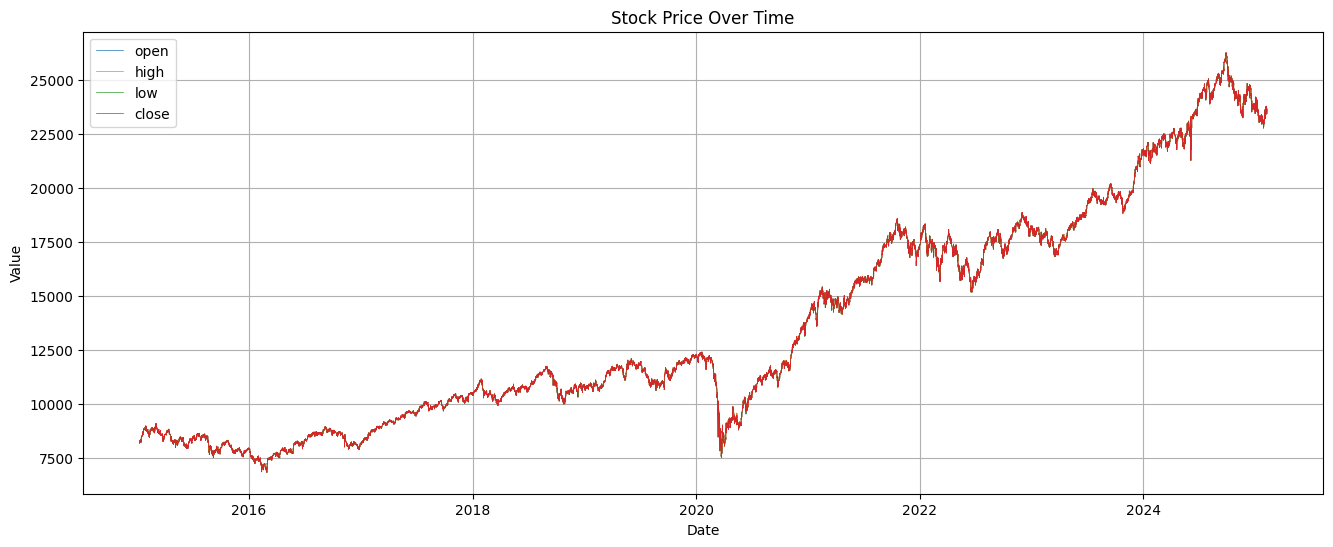

In [38]:
plt.figure(figsize=(16, 6))
plt.plot(stock_data['date_only'], stock_data['open'], label='open', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['high'], label='high', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['low'], label='low', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['close'], label='close', lw=0.5)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

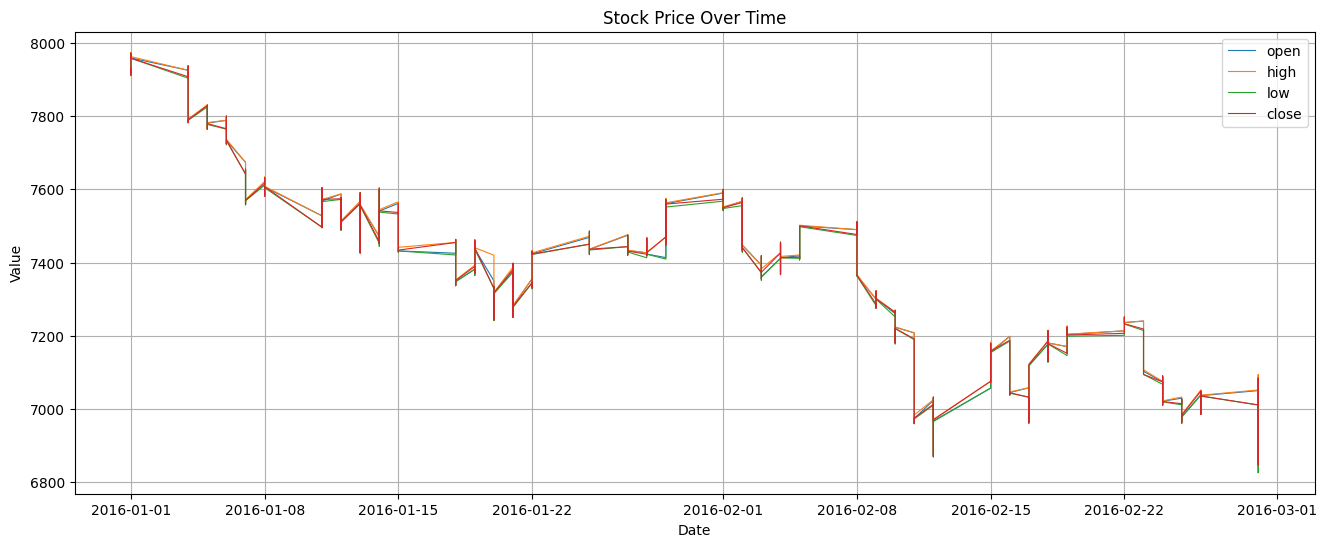

In [40]:
stock_data_2015 = stock_data[(stock_data['date'].dt.year == 2016) & ((stock_data['date'].dt.month == 1) | (stock_data['date'].dt.month == 2))]

plt.figure(figsize=(16, 6))
plt.plot(stock_data_2015['date_only'], stock_data_2015['open'], label='open', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['high'], label='high', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['low'], label='low', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['close'], label='close', lw=0.8)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Over Time')
plt.legend()
plt.grid(True)
plt.show()